In [1]:
#importing necesary libraries

In [136]:
import numpy as np
import matplotlib.pyplot as plt
# importing datasets from sklearn
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [137]:
# Just a random number of points to generate
np.random.seed(0)
pts = 500
# n_samples=number of points to generate random_state = 321 to generate same numbers
# to reproduce erorr if occured noise=0.15 standart deviation of gausian noise if 
# noise level is high is it harder to classify the data
# factor=0.3 represents smaller circle is 30% of larger circle
X, y = datasets.make_circles(n_samples=pts, random_state=321, noise=0.15, factor=0.3)

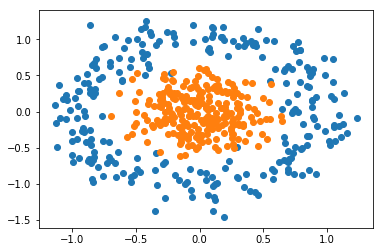

In [138]:
# Grabing all the points that has y label of 0 and selecting 0 column to select X coordinates 
# also grabing 1 column as Y coordinates
# doing the same for the points that has a label value of 1
# and printing them out
plt.scatter(X[y==0,0],[X[y==0,1]])
plt.scatter(X[y==1,0],[X[y==1,1]])
plt.savefig('scatter.png')

In [127]:
#defining out NN as sequential model
model = Sequential()
# Defining input layer
# adding imput and hiddel layers 
# Dense(4) 4 nodes input_shape=(2,) 2 means input nodes to our input layer
# using sigmoid activation function
model.add(Dense(4,input_shape=(2,), activation='sigmoid'))
# defining output layer 
# Basically this model is 2 input nodes 4 hidden layer nodes and 1 output node
model.add(Dense(1, activation='sigmoid'))
# we will use Adam optimizer model and selecting learning rate lr=0.01
# we will use loss function binary_crossentropy
# becouse we have only two classes to separete
# we will use accuracy metrics witch will evalute data how often it matches labels  
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [128]:
# training our model with fit funcion
# passing out data and labels verbose shows the progress bar on each epoch
# batch size and epochs depends on a data on witch you are working.
# shuffle is to shuffle our data to not get stuck in a local minimum
h = model.fit(x=X,y=y, verbose=1, batch_size=30, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 1s 1ms/step - loss: 0.7057 - acc: 0.4620
Epoch 2/100
500/500 [==============================] - 0s 62us/step - loss: 0.6936 - acc: 0.4820
Epoch 3/100
500/500 [==============================] - 0s 63us/step - loss: 0.6936 - acc: 0.5680
Epoch 4/100
500/500 [==============================] - 0s 62us/step - loss: 0.6930 - acc: 0.5600
Epoch 5/100
500/500 [==============================] - 0s 62us/step - loss: 0.6938 - acc: 0.6200
Epoch 6/100
500/500 [==============================] - 0s 53us/step - loss: 0.6921 - acc: 0.5200
Epoch 7/100
500/500 [==============================] - 0s 58us/step - loss: 0.6912 - acc: 0.5120
Epoch 8/100
500/500 [==============================] - 0s 46us/step - loss: 0.6907 - acc: 0.5660
Epoch 9/100
500/500 [==============================] - 0s 54us/step - loss: 0.6898 - acc: 0.6040
Epoch 10/100
500/500 [==============================] - 0s 55us/step - loss: 0.6897 - acc: 0.6540
Epoch 11/100
500/500 [========

Text(0.5,1,'Accuracy')

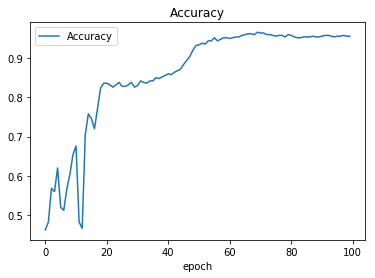

In [129]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['Accuracy'])
plt.title('Accuracy')

Text(0.5,1,'Loss')

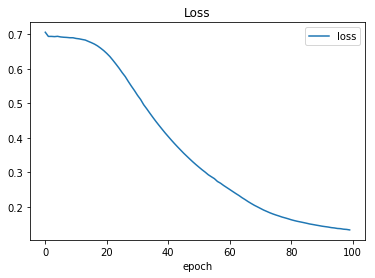

In [130]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('Loss')

In [131]:
# defing a function for descision boundary it takes 3 arguments
# 1 argument is data
# 2 argument is label data
# 3 to a neural network model
def des_bound(X,y,model):
    # producing a grind that spans perfectly for our data
    # from min values to max values for x and y corrdinates and adding a some tolerances
    # -0.25 to a lowest point and 0.25 to highest point
        x_span = np.linspace(min(X[:,0])-0.25, max(X[:,0])+0.25)
        y_span = np.linspace(min(X[:,1])-0.25, max(X[:,1])+0.25)
        
        # meshgrid return coordinate matrices from coordinate vector
        # ravel returns contiguous flattened arrays and c_ to concatinate these arrays
        xx, yy = np.meshgrid(x_span,y_span)
        xx_, yy_ = xx.ravel(), yy.ravel()
        grid = np.c_[xx_,yy_]
        # feeding grid to our predict function trained model test all the points
        pf = model.predict(grid)
        # reshaping to have same dimentions as xx, yy
        z = pf.reshape(xx.shape)
        plt.contourf(xx,yy,z)

The prediction is:  [[0.93873686]]


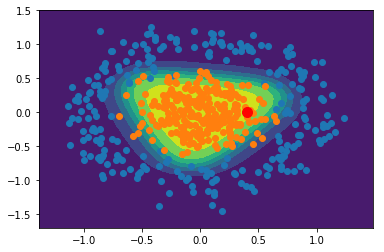

In [132]:
# plotting decision boundary to visualize the separation between two clasess
des_bound(X,y,model)
plt.scatter(X[y==0,0],[X[y==0,1]])
plt.scatter(X[y==1,0],[X[y==1,1]])
# creating an array to our new point to classify it 
x = 0.4
y = 0
point = np.array([[x,y]])
# feeding a new point to our model
prediction = model.predict(point)
# marker = 'o' means dot, other self explainetory
plt.plot([x],[y], marker='o', markersize=10, color='red')
print('The prediction is: ',prediction)